# Testing the luseepy integration

This notebook is meant to be used for basic testing of the luseepy software stack.

The "Sun" object can be used to either calculate the Sun trajectory based on the time interval, or
read previously produced data from a file.

In [3]:
# Imports and utility

# Jupyter magic for autoreload:
%reload_ext autoreload
%autoreload 2

# General dependencies
import  sys
import  numpy as np
import  matplotlib.pyplot as plt

# LuSEE
import  lusee
from    lusee import Observation
from    nav import *

# ----------------------------------------------------
print("Path:")
print("-------------------------------------")
for path_part in sys.path:
    if path_part!='': print(f'''{path_part}''')
print("-------------------------------------")
print(f'''lusee version: {lusee.__version__}''')



Path:
-------------------------------------
/home/maxim/projects/lusee/opsim/notebooks
/home/maxim/projects/lusee/luseepy
/home/maxim/projects/lusee/opsim
/home/maxim/.virtualenvs/lusee/lib/python3.10/site-packages/backports
/usr/local/lib/python310.zip
/usr/local/lib/python3.10
/usr/local/lib/python3.10/lib-dynload
/home/maxim/.virtualenvs/lusee/lib/python3.10/site-packages
/home/maxim/.virtualenvs/lusee/lib/python3.10/site-packages/backports.lzma-0.0.14-py3.10-linux-x86_64.egg
-------------------------------------
lusee version: 1.2-dev



---

### Calculate or read the Sun and Satellite trajectories in the sky

In the two cells below, either calculate from scratch, or read data calculated previously.


In [4]:
# Calculate the trajectory at runtime

interval = "2025-02-10 00:00:00 to 2025-03-07 23:45:00"
mySun = Sun()
mySun.calculate(interval)

o       = Observation(interval)
S       = Satellite()
obsat   = ObservedSatellite(o,S)


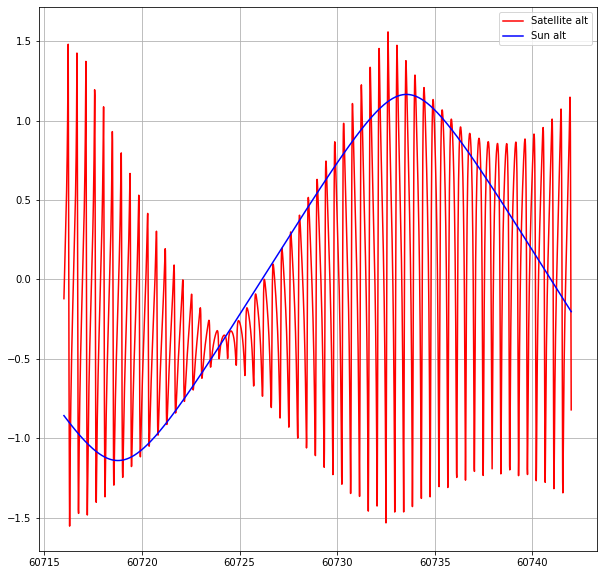

In [6]:
plt.rcParams["figure.figsize"] = [10., 10.]

ax=plt.subplot()
mjd = [timepoint.mjd for timepoint in o.times]
ax.plot(mjd, obsat.alt_rad(),  color="red",    label="Satellite alt")
ax.plot(mySun.mjd, mySun.alt,  color="blue",   label="Sun alt")
ax.grid(True)
_ = plt.legend()


In [8]:
# Read the prefab data on sun trajectory
import os
from nav import Sun

# ---
print('Current directory:', os.getcwd())

mySun = Sun()

# cachefile = '../data/2025-02-04_03-07.npy'
cachefile = '../data/archive/2025-02-04_2025-08-10.npy'

mySun.read_trajectory(cachefile)
print(f'''Number of points read from the file {cachefile}: {mySun.N}''')

print(mySun.crossings)

# prev = None

# for crs in mySun.crossings:
#     # print(mySun.alt[crs:crs+2])
#     print(mySun.mjd[crs])
#     prev = mySun.mjd[crs]
#     if prev is not None:
#         print(mySun.mjd[crs] - prev)
#         prev = mySun.mjd[crs]
        


# for d in mySun.day: print(d)



Current directory: /home/maxim/projects/lusee/opsim/notebooks
Number of points read from the file ../data/archive/2025-02-04_2025-08-10.npy: 18048
[  133  1549  2970  4391  5804  7228  8634 10061 11463 12890 14291 15717
 17120]


---

### Plot

Regardless of whether it was calculated or read from a file, we can check the data with some graphics

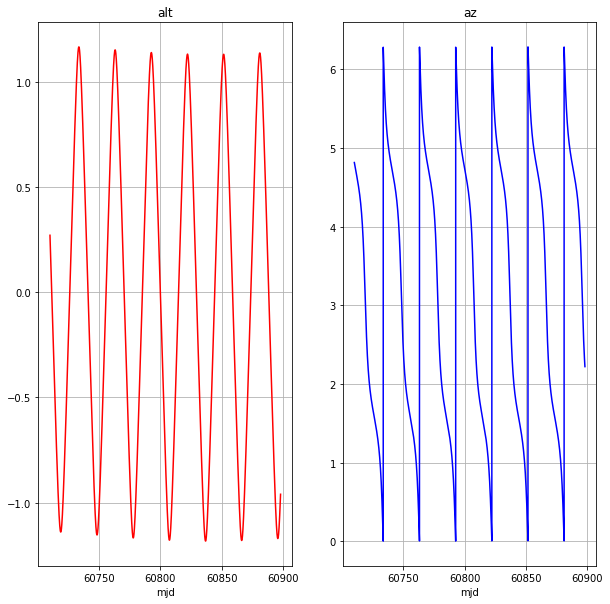

In [9]:
fig, (p1, p2) = plt.subplots(1,2)
plt.rcParams["figure.figsize"] = [20., 10.]
plt.rcParams["figure.autolayout"] = True

p1.set_title("alt")
p1.plot(mySun.mjd, mySun.alt, color="red")
p1.grid(True)
p1.set_xlabel('mjd')


p2.set_title("az")
p2.plot(mySun.mjd, mySun.az, color="blue")
p2.grid(True)
p2.set_xlabel('mjd')
# plt.title("Time interval: "+interval)
plt.show()


---

Note that the time unit for "hours" is still the same as for other values, in the original case it's 15 min intervals, which is 0.25 hrs

In [10]:
alt = mySun.alt
mjd = mySun.mjd
az  = mySun.az
hrs = mySun.hrsFromSunrise
print(hrs[0:100]) # test printout

[-4280.25 -4280.   -4279.75 -4279.5  -4279.25 -4279.   -4278.75 -4278.5
 -4278.25 -4278.   -4277.75 -4277.5  -4277.25 -4277.   -4276.75 -4276.5
 -4276.25 -4276.   -4275.75 -4275.5  -4275.25 -4275.   -4274.75 -4274.5
 -4274.25 -4274.   -4273.75 -4273.5  -4273.25 -4273.   -4272.75 -4272.5
 -4272.25 -4272.   -4271.75 -4271.5  -4271.25 -4271.   -4270.75 -4270.5
 -4270.25 -4270.   -4269.75 -4269.5  -4269.25 -4269.   -4268.75 -4268.5
 -4268.25 -4268.   -4267.75 -4267.5  -4267.25 -4267.   -4266.75 -4266.5
 -4266.25 -4266.   -4265.75 -4265.5  -4265.25 -4265.   -4264.75 -4264.5
 -4264.25 -4264.   -4263.75 -4263.5  -4263.25 -4263.   -4262.75 -4262.5
 -4262.25 -4262.   -4261.75 -4261.5  -4261.25 -4261.   -4260.75 -4260.5
 -4260.25 -4260.   -4259.75 -4259.5  -4259.25 -4259.   -4258.75 -4258.5
 -4258.25 -4258.   -4257.75 -4257.5  -4257.25 -4257.   -4256.75 -4256.5
 -4256.25 -4256.   -4255.75 -4255.5 ]
